## **Contents**
-  [Introduction](#i)
-  [1.Importing Libraries](#2)
-  [2.Dataset Managament](#3)
    -  [2.1.Initializing Dataset](#3.1)
    -  [2.2.Visualizing Dataset](#3.2)
-  [3.Loading and Testing pre-trained model](#4)
    -  [3.1.CRAFT](#4.1)
    -  [3.2.Tesseract](#4.2)

## **Introduction** <a class="anchor" id="i"></a>


In this notebook, I am visualizing the FUND dataset and also testing [CRAFT](https://arxiv.org/abs/1703.06870) model using [Pytorch](https://pytorch.org/) library and [Tesseract](https://tesseract-ocr.github.io/).

&nbsp;&nbsp;&nbsp;&nbsp;Character-Region Awareness For Text detection is to localize the individual character regions and link the detected characters to a text instance.
CRAFT adopts a fully convolutional network architecture based on VGG-16 as its backbone. In simple words, VGG16 is essentially the feature extracting architecture that is used to encode the network’s input into a certain feature representation. The decoding segment of the CRAFT network is similar to UNet. It has skip connections that aggregate low-level features.CRAFT is an multilingual text detection algorthim.

CRAFT predicts two scores for each character:<br>
&nbsp;&nbsp;&nbsp;&nbsp;- Region Score: As the name suggests, it gives the region of the character. It localizes the character.<br>
&nbsp;&nbsp;&nbsp;&nbsp;- Affinity Score: ‘Affinity’ is the degree to which a substance tends to combine with another. So, an affinity score merges characters into a single instance (a word).<br>

<img src= "https://miro.medium.com/max/822/1*41V2AiI3_RjSsp_j02ieYA.png"  style='width: 800px;'><br>

Tesseract is an OCR engine with support for unicode and the ability to recognize more than 100 languages out of the box. It can be trained to recognize other languages.<br>

<img src= "https://www.researchgate.net/publication/341936500/figure/fig2/AS:901432035246080@1591929553630/Tesseract-OCR-engine-process-8.ppm"  style='width: 800px;'>

Read more about CRAFT [here](https://miro.medium.com/max/822/1*41V2AiI3_RjSsp_j02ieYA.png)<br>
Read more about Tesseract [here](https://miro.medium.com/max/822/1*41V2AiI3_RjSsp_j02ieYA.png)



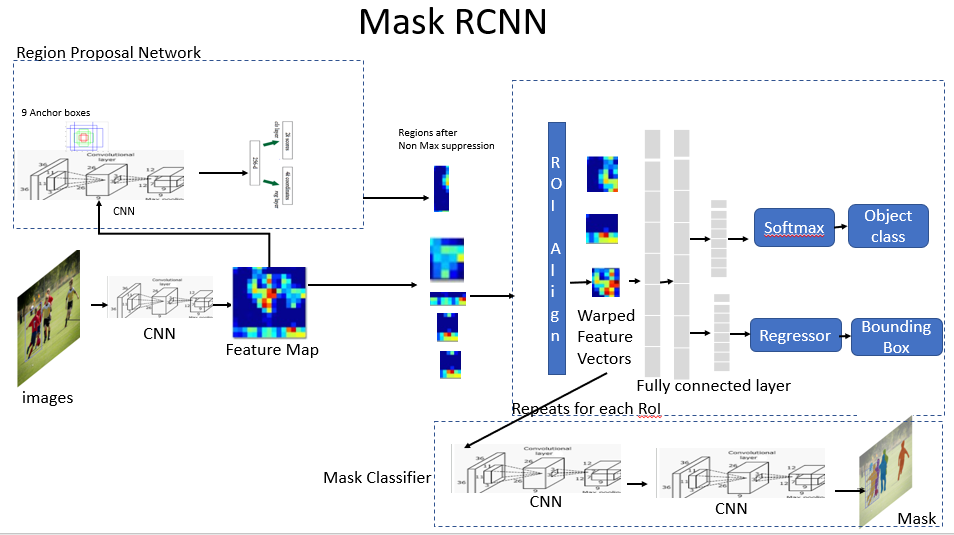

### **1.Importing Libraries** <a class="anchor" id="1"></a>

In [1]:
import os
import cv2
import json
import pytesseract
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from pytesseract import Output

### **2.Initializing Dataset** <a class="anchor" id="2"></a>

In [2]:
TRAIN_IMAGE_PATH = 'dataset/training_data/images/'
TRAIN_ANNOTATION_PATH = 'dataset/training_data/annotations/'

train_images_path = np.char.add(TRAIN_IMAGE_PATH,np.array(os.listdir(TRAIN_IMAGE_PATH)))
train_annotation_path = np.char.add(TRAIN_ANNOTATION_PATH,np.array(os.listdir(TRAIN_ANNOTATION_PATH)))

print(f'Number of Train Images : {len(train_images_path)}')


Number of Train Images : 149


### **2.Dataset Managament** <a class="anchor" id="2"></a>

#### 1.Initializing Dataset <a class="anchor" id="2.1"></a>

In [3]:
TRAIN_IMAGE_PATH = 'dataset/training_data/images/'
TRAIN_ANNOTATION_PATH = 'dataset/training_data/annotations/'

train_images_path = np.char.add(TRAIN_IMAGE_PATH,np.array(os.listdir(TRAIN_IMAGE_PATH)))
train_annotation_path = np.char.add(TRAIN_ANNOTATION_PATH,np.array(os.listdir(TRAIN_ANNOTATION_PATH)))

print(f'Number of Train Images : {len(train_images_path)}')


Number of Train Images : 149


#### 2.Visualizing Dataset <a class="anchor" id="2.2"></a>

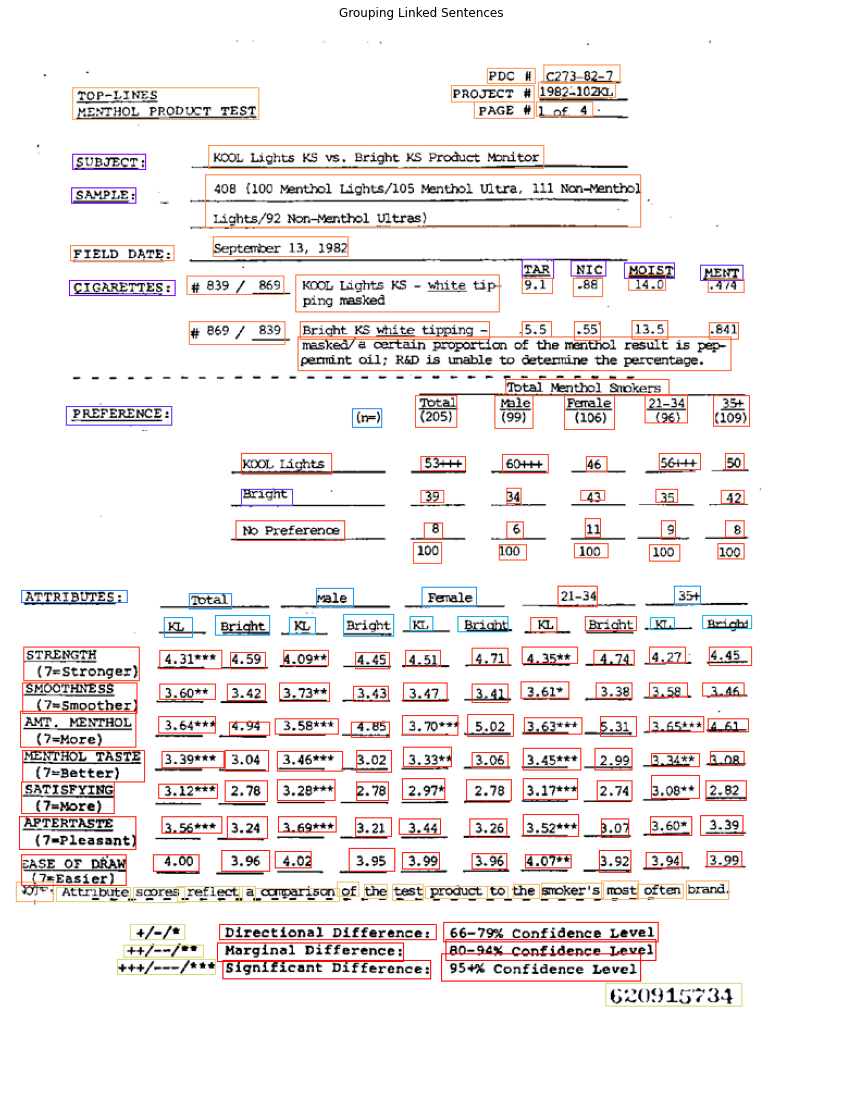

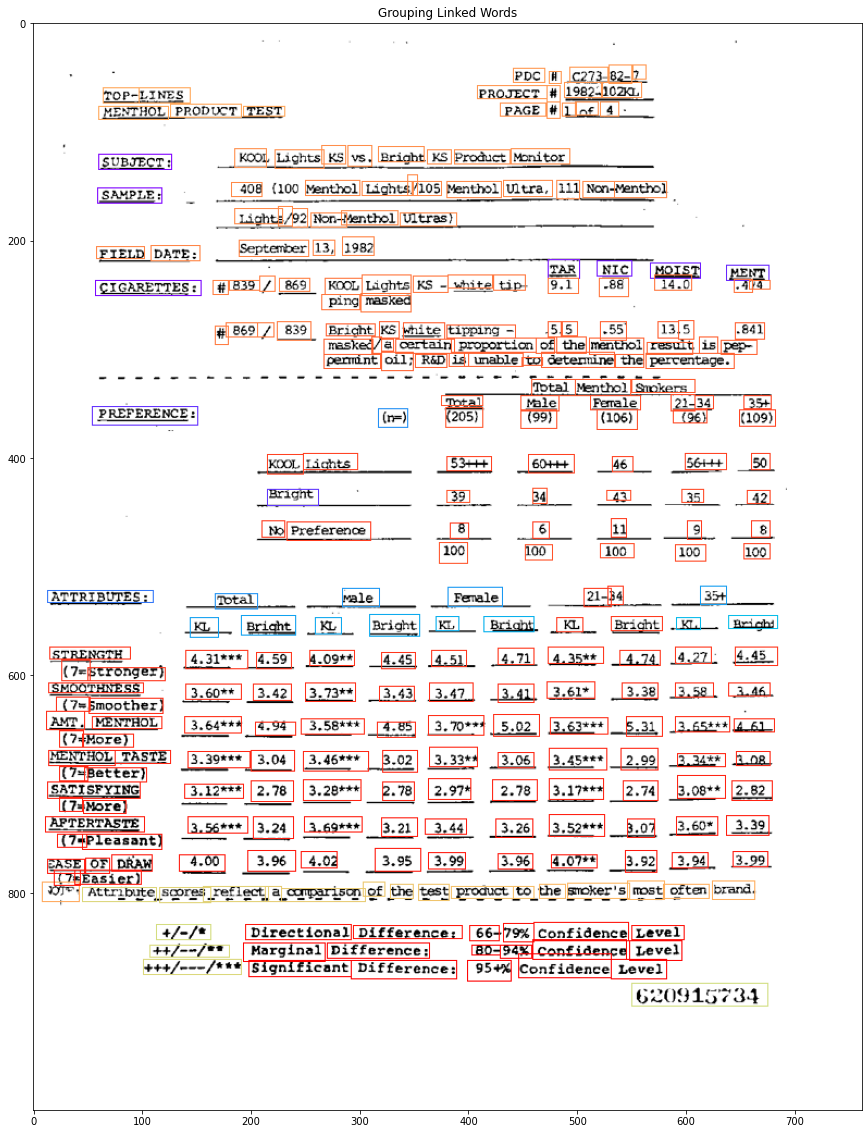

In [4]:
n = 3
img = cv2.imread(train_images_path[n])

plt.figure(figsize=(20,20))

form = json.load(open(train_annotation_path[n]))['form']
colors = cm.rainbow(np.linspace(0, 1, len(form)))

color_code = {}
for box, color in zip(form, colors):
    id = box['id']
    link = box['linking']
    if len(link) != 0:
        for linked_id in link:
            color_code[linked_id[1]] = color
    color_code[id] = color

for i in form:
    color = (255, 0, 0, 0)
    thickness = 1
    bounding_vertex = tuple(i['box'])
    x_min, y_min, x_max, y_max = bounding_vertex
    img = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color_code[i['id']][:-1]*255, thickness )

plt.axis('off')
plt.imshow(img)
plt.title("Grouping Linked Sentences")
plt.show()

img = cv2.imread(train_images_path[n])

for i in form:
    color = (0, 0, 255)
    thickness = 1

    for j in i['words']:
        bounding_vertex = tuple(j['box'])
        x_min, y_min, x_max, y_max = bounding_vertex
        img = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color_code[i['id']][:-1]*255, thickness )

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.title("Grouping Linked Words")
plt.show()

In [5]:
for x,i in enumerate(json.load(open(train_annotation_path[n]))['form']):
    print(i['label'],i['text'])
    for j in i['words']:
        print(j['text'],' ')
    print('-----------------')
    if x == 10:
        break

question SUBJECT:
SUBJECT:  
-----------------
question SAMPLE:
SAMPLE:  
-----------------
question CIGARETTES:
CIGARETTES:  
-----------------
question TAR
TAR  
-----------------
answer 9.1
9.1  
-----------------
question NIC
NIC  
-----------------
answer .88
.88  
-----------------
question MOIST
MOIST  
-----------------
answer 14.0
14.0  
-----------------
question MENT
MENT  
-----------------
answer .841
.841  
-----------------


In [6]:
labels = []
for box in json.load(open(train_annotation_path[0]))['form']:
    if box['label'] not in labels:
        labels.append(box['label'])

print(labels)

['other', 'question', 'answer', 'header']


In [7]:
json.load(open(train_annotation_path[n]))['form'][0]

{'box': [60, 121, 127, 135],
 'text': 'SUBJECT:',
 'label': 'question',
 'words': [{'box': [60, 121, 127, 135], 'text': 'SUBJECT:'}],
 'linking': [[0, 146]],
 'id': 0}

### **3.Loading and Testing pre-trained model** <a class="anchor" id="4"></a>

In [8]:
from word_Detection import *
model = word_detector(True,"saved_models/craft_mlt_25k.pth","saved_models/craft_refiner_CTW1500.pth",)
custom_config = r'--oem 3 --psm 6'

Loading weights from checkpoint (saved_models/craft_mlt_25k.pth)
Loading weights of refiner from checkpoint (saved_models/craft_refiner_CTW1500.pth)


#### 1.CRAFT <a class="anchor" id="4.1"></a>

Loading weights from checkpoint (saved_models/craft_mlt_25k.pth)
Loading weights of refiner from checkpoint (saved_models/craft_refiner_CTW1500.pth)


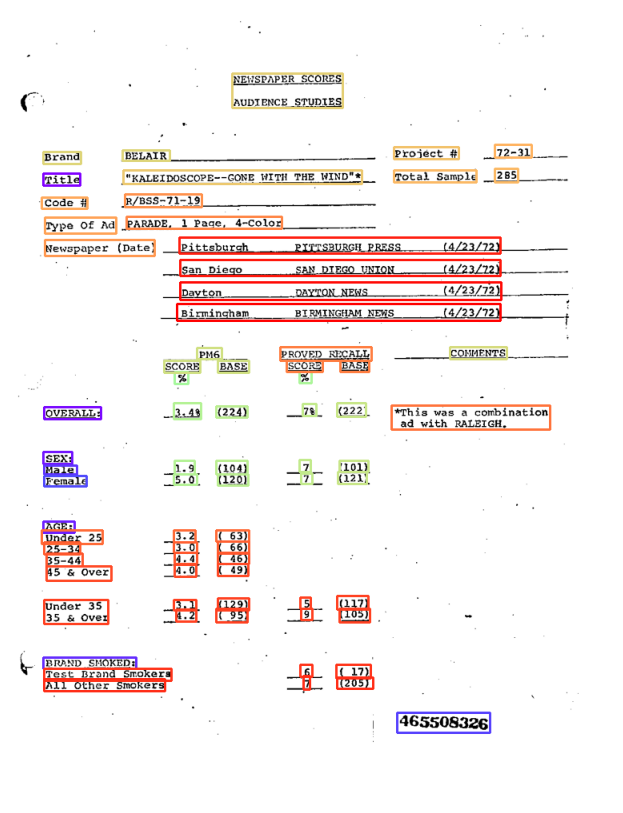

<Figure size 3600x3600 with 0 Axes>

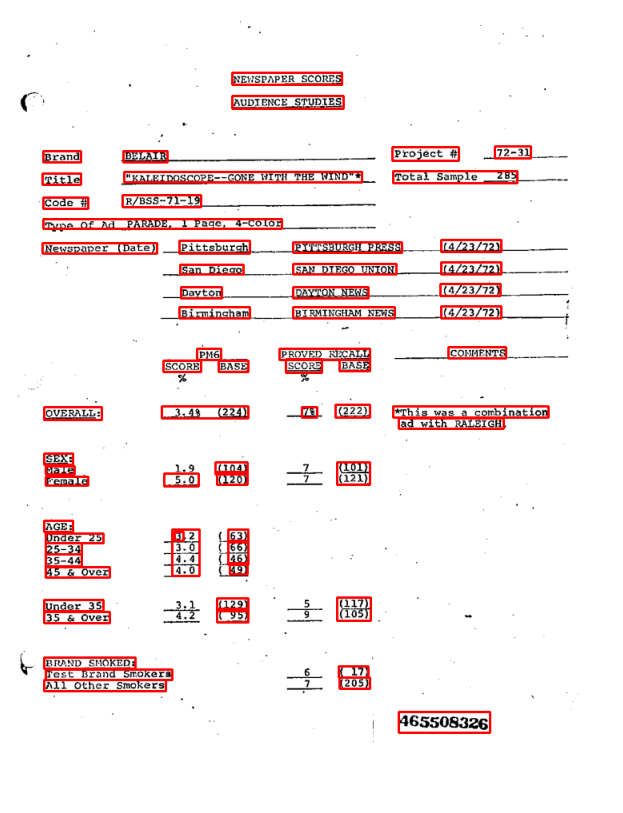

In [9]:
from word_Detection import *
model = word_detector(True,"saved_models/craft_mlt_25k.pth","saved_models/craft_refiner_CTW1500.pth",)

n = 9
thickness = 2
img = cv2.imread(train_images_path[n])

plt.figure(figsize=(50,50))

form = json.load(open(train_annotation_path[n]))['form']
colors = cm.rainbow(np.linspace(0, 1, len(form)))

color_code = {}
for box, color in zip(form, colors):
    id = box['id']
    link = box['linking']
    if len(link) != 0:
        for linked_id in link:
            color_code[linked_id[1]] = color
    color_code[id] = color

for i in form:
    color = (255, 0, 0, 0)
    
    bounding_vertex = tuple(i['box'])
    x_min, y_min, x_max, y_max = bounding_vertex
    img = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color_code[i['id']][:-1]*255, thickness )

plt.subplot(3, 2, 1)
plt.axis('off')
plt.imshow(img)

plt.figure(figsize=(50,50))
img = cv2.imread(train_images_path[n])
boxxes, craft_scores = model.detect(train_images_path[n])
boxxes = boxxes.astype(np.int32)
color = (255, 0, 0, 0)
plt.figure(figsize=(50,50))
for box in boxxes:
    bounding_vertex = tuple(i['box'])
    x_min, y_min = tuple(box[0])
    x_max, y_max = tuple(box[2])
    img = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness )

plt.subplot(3, 2, 2)
plt.axis('off')
plt.imshow(img)

#### 2.TESSERACT <a class="anchor" id="4.2"></a>

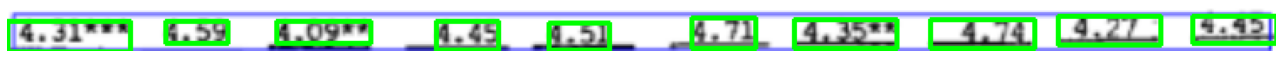

In [10]:
import cv2
import pytesseract
from pytesseract import Output
img = cv2.imread("test_images/test_word.png")

h, w, c = img.shape
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['text'])
for i in range(n_boxes):
    if float(d['conf'][i]) > 0:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


plt.figure(figsize=(50,50))
plt.subplot(3, 2, 1)
plt.axis('off')
plt.imshow(img)



In [11]:
img = cv2.imread(train_images_path[n])
pytesseract.image_to_string(img, config=custom_config)


". NEWSPAPER SCORES\n( AUDIENCE STUDIES\nBrand BELAIR Project #72\nwitle SKALEIDOSCOPE=-GONE WITH THE WIND'* _ Total Sample _285_______\nCode # R/BSS-71-19\nType Of Ad PARADE, 1 Page, 4-Color\nNewspaper (Date) __Pittsburch PITTSBURGH PRESS 4/23/72)\n$an_ Diego SAN DIEGO UNION __(4/23/72) _______.\nDayton DAYTON NEWS 4/23/72)\nBirmingham BIRMINGHAM NEWS 4/23/72 :\nPMG PROVED RECALL, coMMeNTs\nSCORR BASE SCOR BASE\n% *\nOVERALL: 3.48 (224) Ti. @22) *?his was a combination\nad with RALEIGH,\nSEX:\nMale 1.9 104! z (201),\nFemale 5.0 120 7 12%)\nAGE:\nUnder 25 3.2 63)\n(25-34 3.6 C66) .\n35-44 4.4 46.\n45 & Over a 49)\nUnder 35 3.2 129} . 5 (217) °\n35 & Over 4.2 95: 3 ts . -\n(L neann_stioxen: .\nTest Brand Smokers 6 (an\nAll Other Smokers z (205)\n| 965508326\n"